In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as st


In [3]:
sdt = pd.read_csv('./assest/StudentsPerformance.csv')

In [4]:
sdt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
sdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
null_values_table = sdt.isnull().sum()
print(null_values_table)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
sdt.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
sdt.value_counts('gender')

gender
female    518
male      482
dtype: int64

In [8]:
sdt.value_counts('parental level of education')

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64

In [9]:
sdt.value_counts('race/ethnicity')

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
dtype: int64

In [10]:
sdt.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [57]:
math_score_mean = sdt['math score'].mean()
print(math_score_mean)

66.089


In [12]:
reading_score_mean = sdt['reading score'].mean()
print(reading_score_mean)

69.169


In [13]:
writing_score_mean = sdt['writing score'].mean()
print(writing_score_mean)

68.054


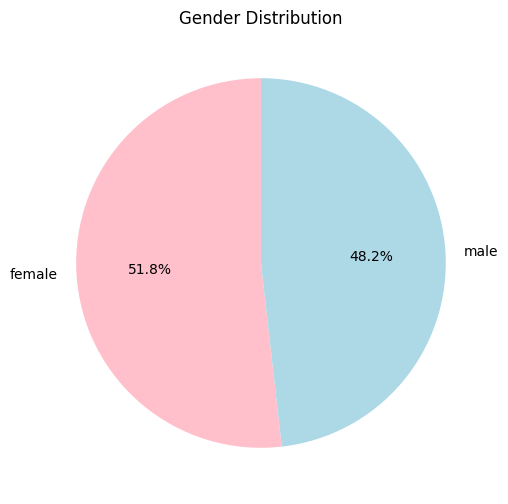

In [7]:
gender_counts = sdt['gender'].value_counts()
sns.set_palette(['pink', 'lightblue'])
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

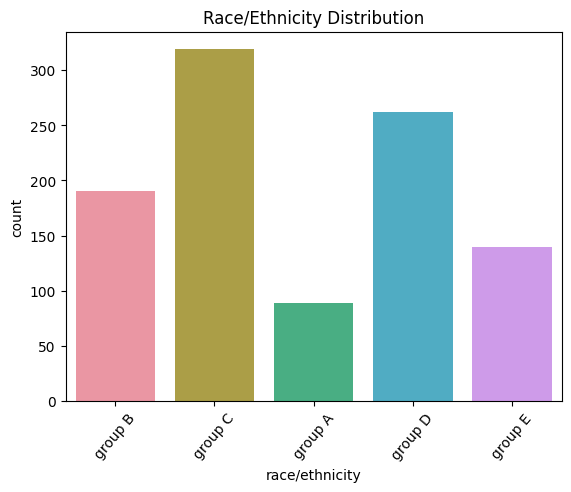

In [58]:
sns.countplot(data=sdt, x='race/ethnicity')
plt.title('Race/Ethnicity Distribution')
plt.xticks(rotation=50)
plt.show()

Text(0.5, 1.0, 'Distribution of Groups by Gender')

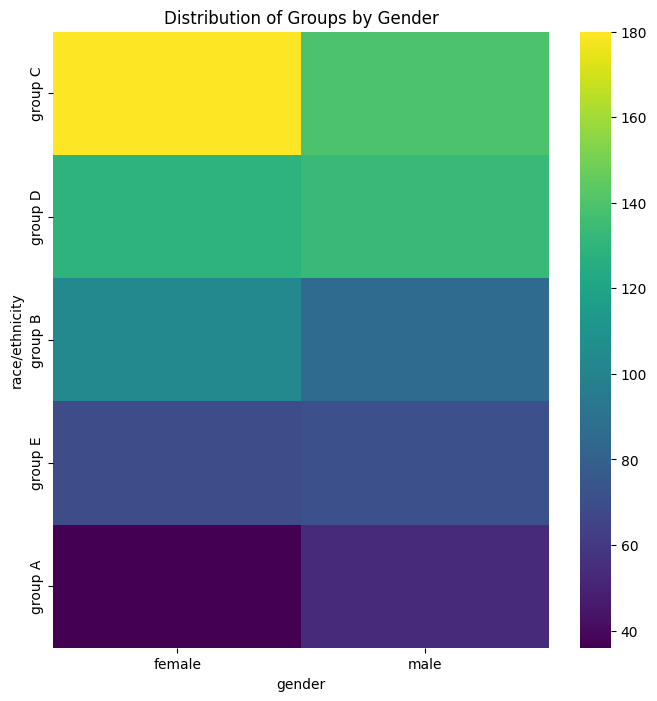

In [59]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race/ethnicity'].value_counts()
    for x_label, grp in sdt.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('race/ethnicity')
plt.title('Distribution of Groups by Gender')


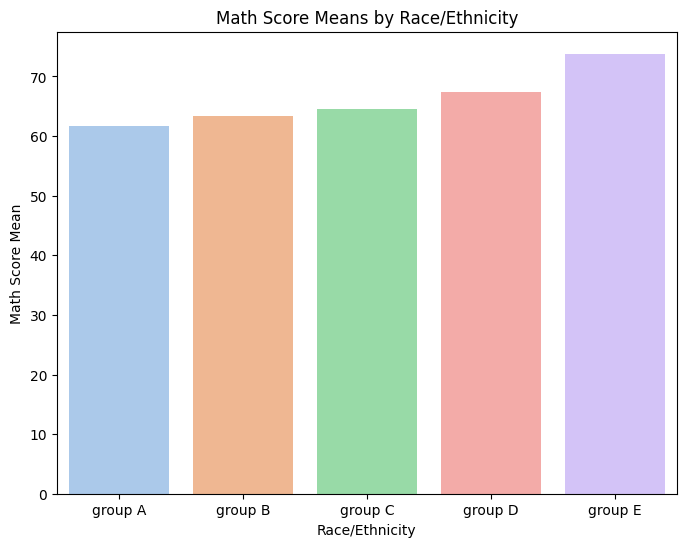

In [52]:
result = sdt.groupby('race/ethnicity').agg({'math score': ['mean', 'std'], 'reading score': ['mean', 'std'],'writing score': ['mean', 'std']})

math_means = result['math score']['mean']
colors = sns.color_palette("pastel")
plt.figure(figsize=(8, 6))
sns.barplot(x=math_means.index, y=math_means, palette=colors)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score Mean')
plt.title('Math Score Means by Race/Ethnicity')
plt.show()

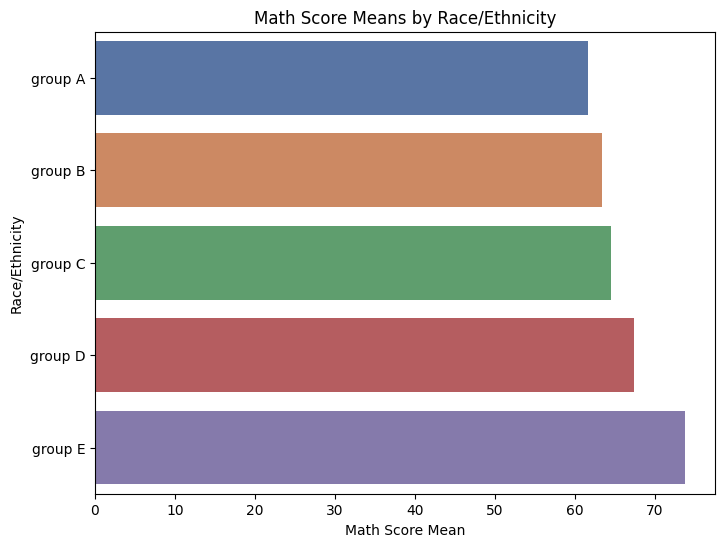

In [55]:
reading_means_means = result['reading score']['mean']
colors = sns.color_palette("deep")
plt.figure(figsize=(8, 6))
sns.barplot(x=math_means, y=math_means.index, palette=colors)
plt.xlabel('Math Score Mean')
plt.ylabel('Race/Ethnicity')
plt.title('Math Score Means by Race/Ethnicity')
plt.show()

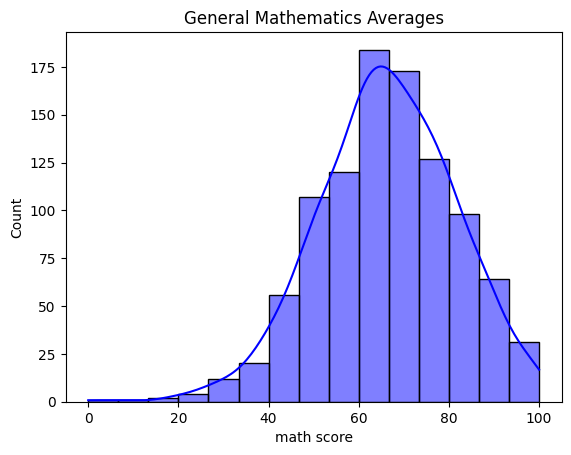

In [65]:
sns.histplot(data=sdt, x='math score',kde=True, color='blue', bins=15)
plt.title('General Mathematics Averages')
plt.show()

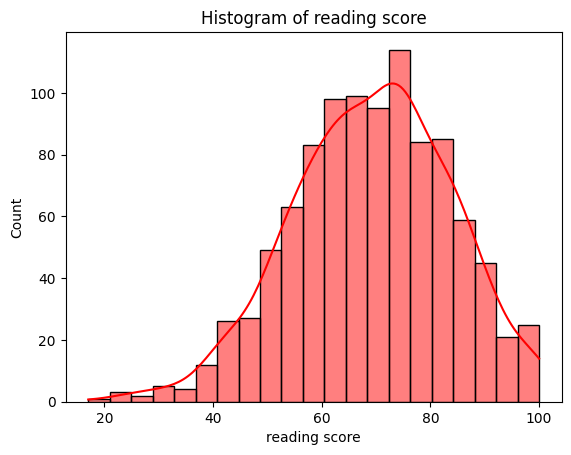

In [37]:
column_name = 'reading score'
sns.histplot(sdt[column_name], kde=True, color='red')
plt.title(f'Histogram of {column_name}')
plt.show()

sns.countplot(), calculate the numbers of columns and make a plot

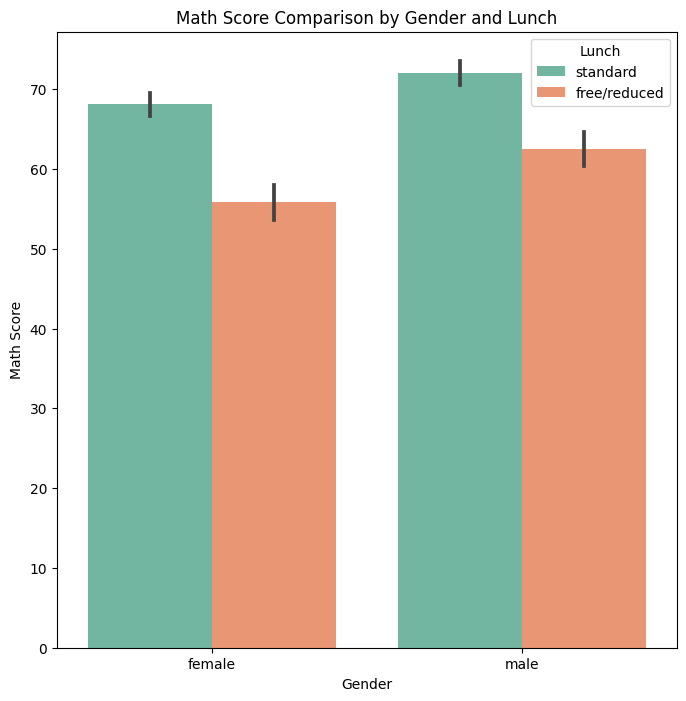

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(data=sdt, x='gender', y='math score', hue='lunch', palette='Set2')
plt.title('Math Score Comparison by Gender and Lunch')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.legend(title='Lunch', loc='upper right')
plt.show()

Here we see that girls and boys on standard diets have higher math scores than those on free diets.This code plots a bar chart with maths grades for each gender, separated by the 'gender' column, colored by 'lunch' status.

analysis result

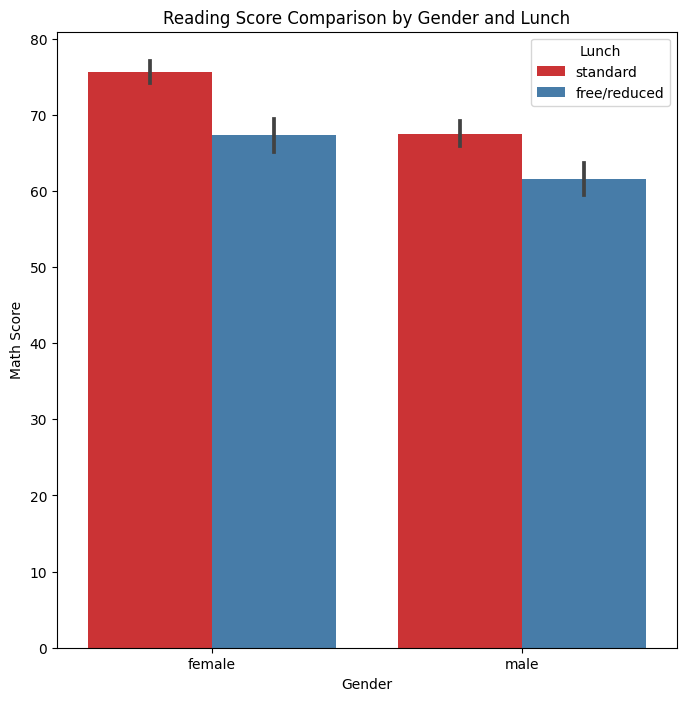

In [38]:
plt.figure(figsize=(8, 8))
sns.barplot(data=sdt, x='gender', y='reading score', hue='lunch', palette='Set1')
plt.title('Reading Score Comparison by Gender and Lunch')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.legend(title='Lunch', loc='upper right')
plt.show()

Here we see that girls and boys on standard diets have higher reading scores than those on free diets.This code plots a bar chart with reading score for each gender, separated by the 'gender' column, colored by 'lunch' status.

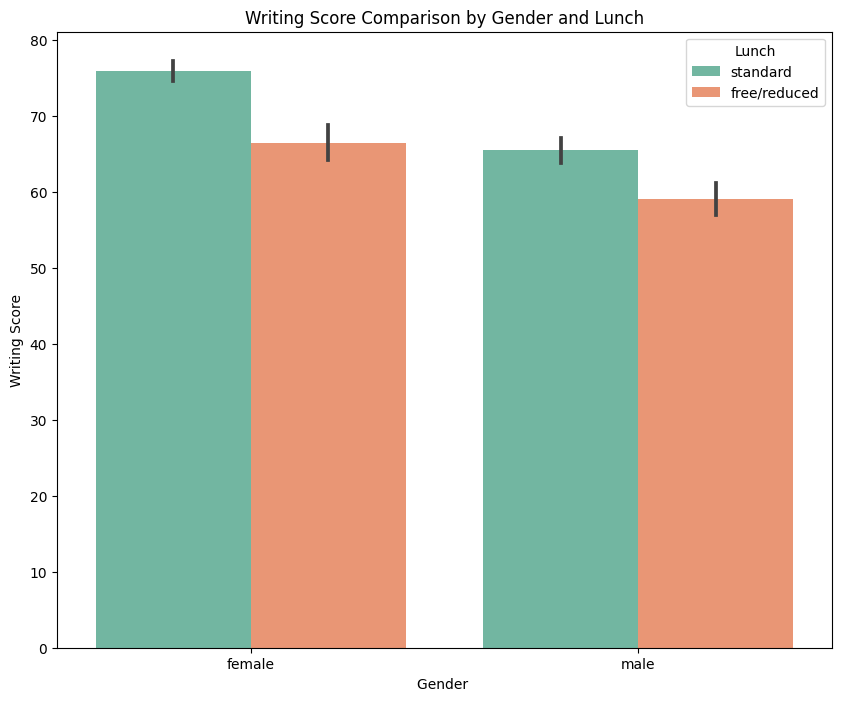

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=sdt, x='gender', y='writing score', hue='lunch', palette='Set2')
plt.title('Writing Score Comparison by Gender and Lunch')
plt.xlabel('Gender ')
plt.ylabel('Writing Score')
plt.legend(title='Lunch', loc='upper right')
plt.show()

Here we see that girls and boys on standard diets have higher math scores than those on free diets.This code plots a bar chart with writing score for each gender, separated by the 'gender' column, colored by 'lunch' status.

Math score histogram

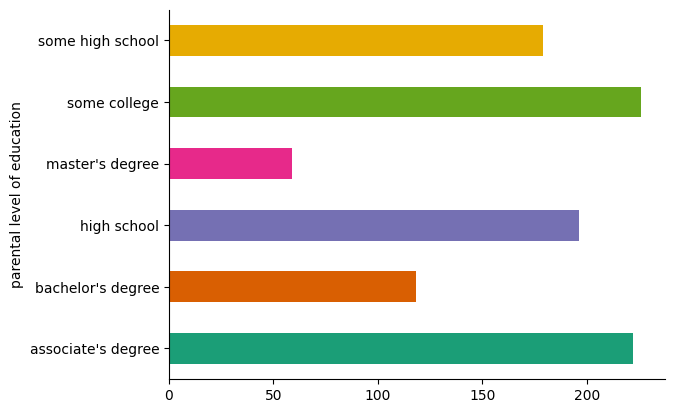

In [67]:
sdt.groupby('parental level of education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Histogram of parents' general educational status

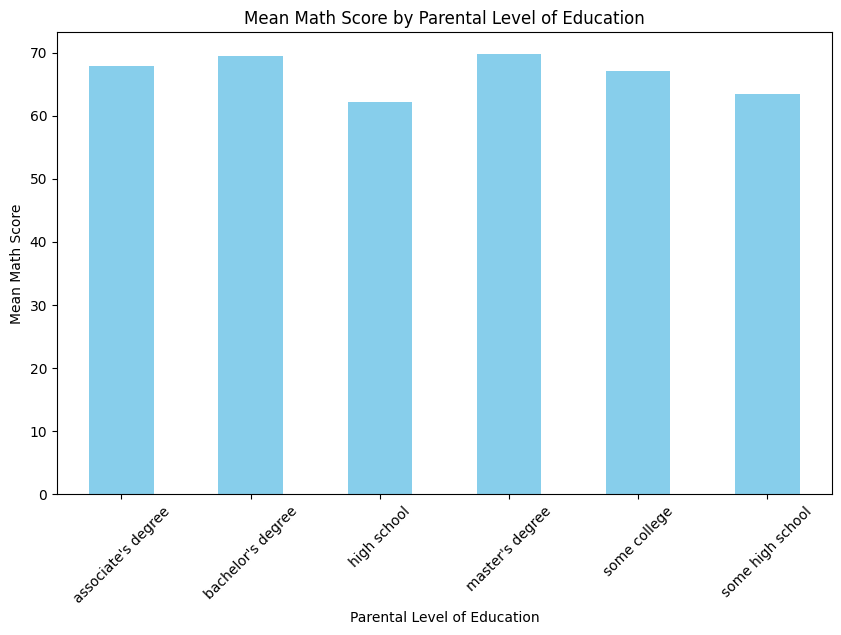

In [66]:
group_one = sdt.groupby("parental level of education")["math score"].mean()
plt.figure(figsize=(10, 6))
group_one.plot(kind='bar', color='skyblue')
plt.title('Mean Math Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Mean Math Score')
plt.xticks(rotation=45)
plt.show()

Here we compare the mathematics scores of boys and girls according to the educational background of the families.

A bar plot about Parental Level of Education and Math notes mean

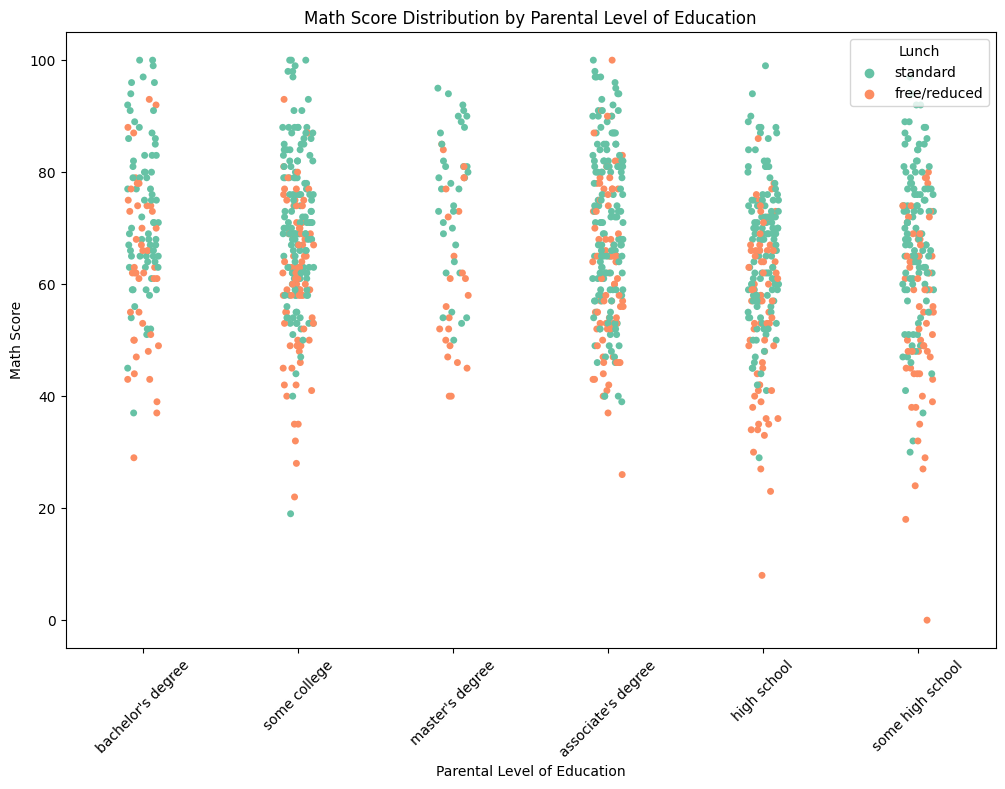

In [ ]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=sdt, x="parental level of education", y="math score", jitter=True, hue="lunch", palette="Set2")
plt.title('Math Score Distribution by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.xticks(rotation=45)
plt.legend(title='Lunch', loc='upper right')
plt.show()

Here, we compare the mathematics scores of boys and girls according to their lunch meals, according to the educational background of the families. We see that those with higher education levels and standard nutrition are more successful.This code creates a stripplot showing the distribution of mathematics scores of students with different parental education levels, using the seaborn and matplotlib libraries.

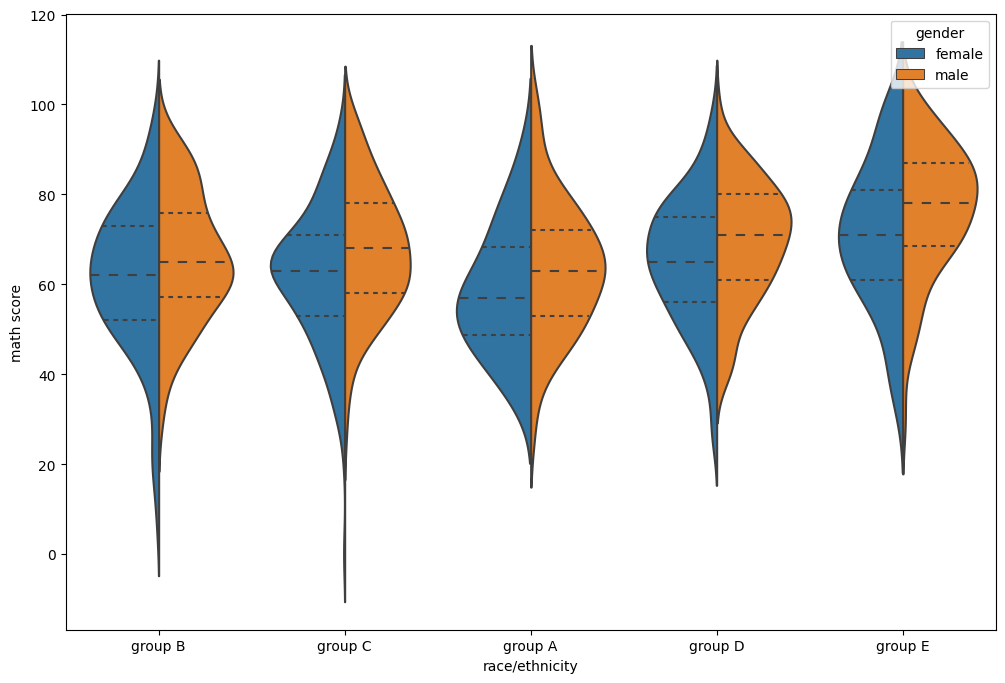

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='race/ethnicity', y='math score', hue='gender', data=sdt, split=True, inner='quart')
plt.show()

This code uses the seaborn and matplotlib libraries to create a violin plot that plots the math scores of students in different racial/ethnic groups based on their gender.

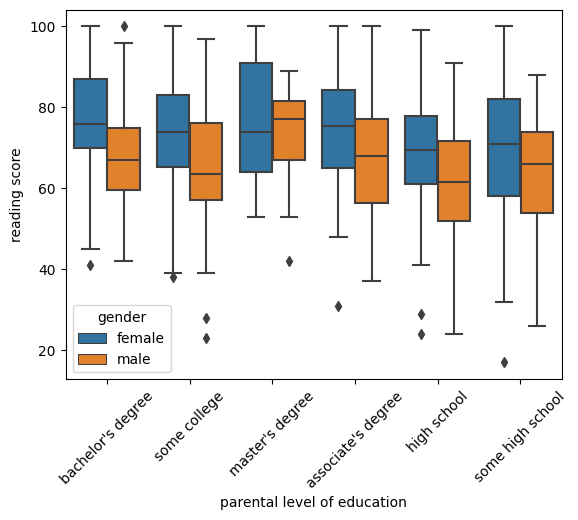

In [ ]:
sns.boxplot(data=sdt, x='parental level of education', y='reading score', hue='gender')
plt.xticks(rotation=45)
plt.show()

This code uses the seaborn and matplotlib libraries to create a boxplot showing the reading scores of students with different parental education levels by gender.

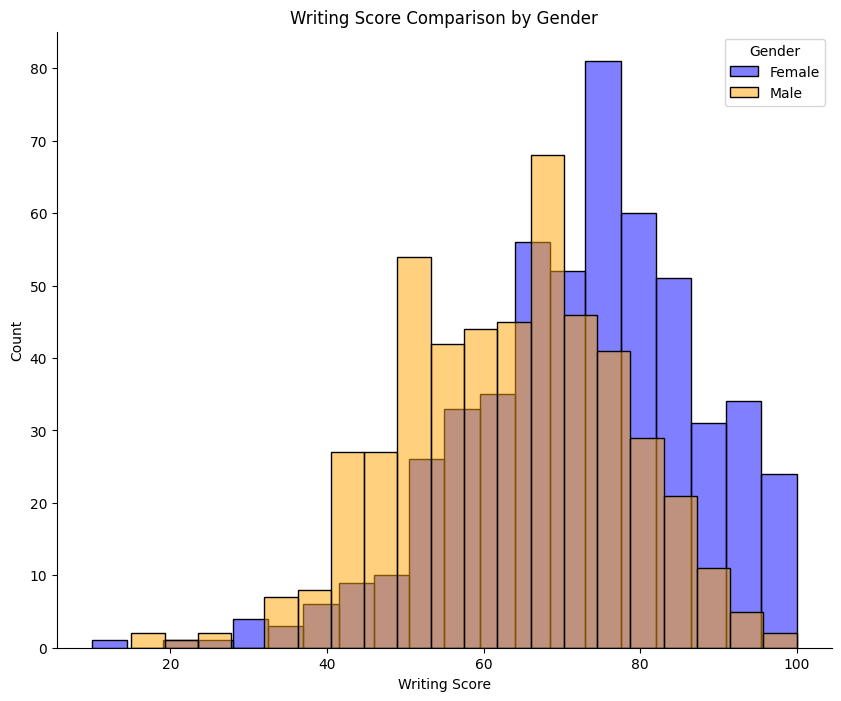

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=sdt[sdt['gender'] == 'female'], x='writing score', bins=20, color='blue', alpha=0.5, label='Female')
sns.histplot(data=sdt[sdt['gender'] == 'male'], x='writing score', bins=20, color='orange', alpha=0.5, label='Male')

plt.title('Writing Score Comparison by Gender')
plt.xlabel('Writing Score')
plt.legend(title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

This chart contains two separate histograms to compare the distribution of male and female students' writing scores. The blue histogram represents female students, and the orange histogram represents male students. Both histograms are on the same chart and provide a visual representation of the comparison. The alpha parameter prevents colors from mixing and controls transparency.

This chart shows student numbers by parental education levels in a horizontal bar chart and hides the right and top border lines.

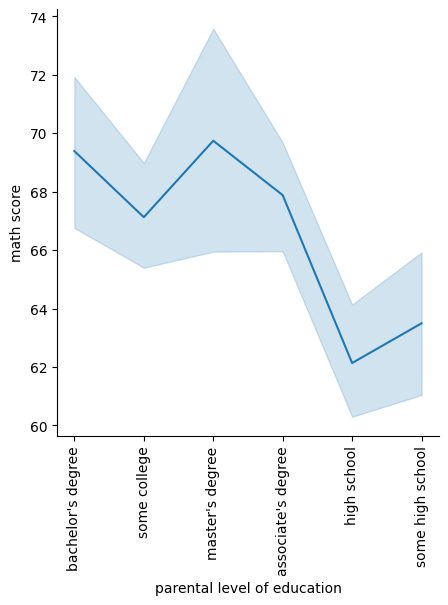

In [ ]:
sns.relplot(data=sdt, x='parental level of education', y='math score',kind='line')
sns.set_style('dark')
plt.xticks(rotation=90)
plt.show()

This line chart shows math scores connected by a line for each parent's education level. The sns.relplot function is used to visualize the relationships in the data set and specifies the type of line plot with the kind='line' parameter.

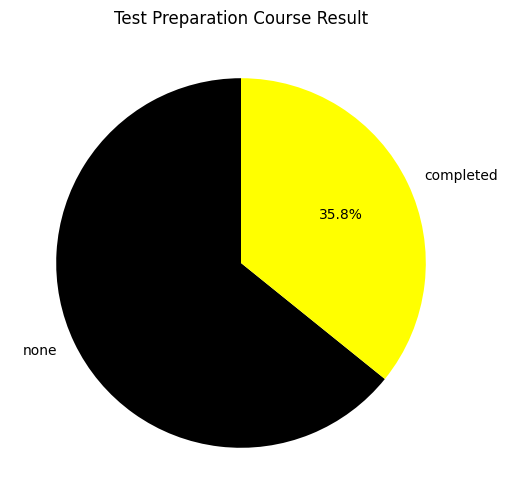

In [72]:
course_counts = sdt['test preparation course'].value_counts()
sns.set_palette(['black', 'yellow'])
course_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Test Preparation Course Result')
plt.ylabel('')
plt.show()

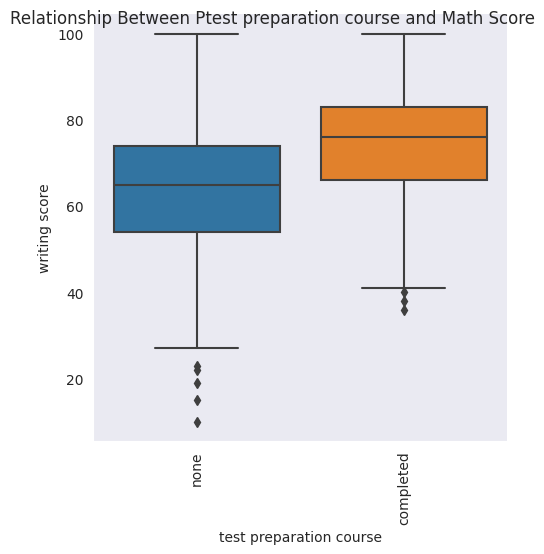

In [ ]:
g = sns.catplot(data=sdt, x='test preparation course', y='writing score', kind='box')
g.fig.suptitle('Relationship Between Ptest preparation course and Math Score')
sns.set_style('white')
plt.xticks(rotation=90)
plt.show()

<ipython-input-39-7f33619d1fa5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sdt.corr(), annot=True)


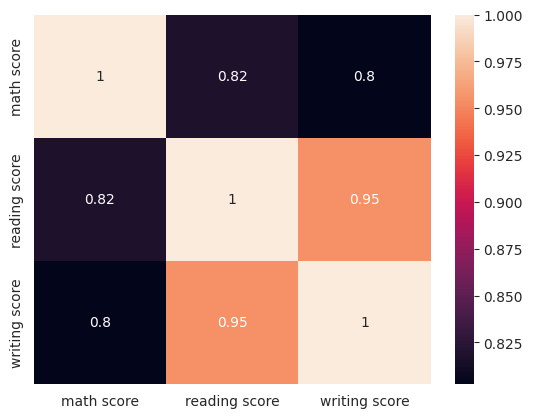

In [ ]:
sns.heatmap(sdt.corr(), annot=True)
plt.show()

There is a very strong and positive relationship between students' writing and reading skills. We also see that there is a strong and positive relationship between mathematics, writing and reading.

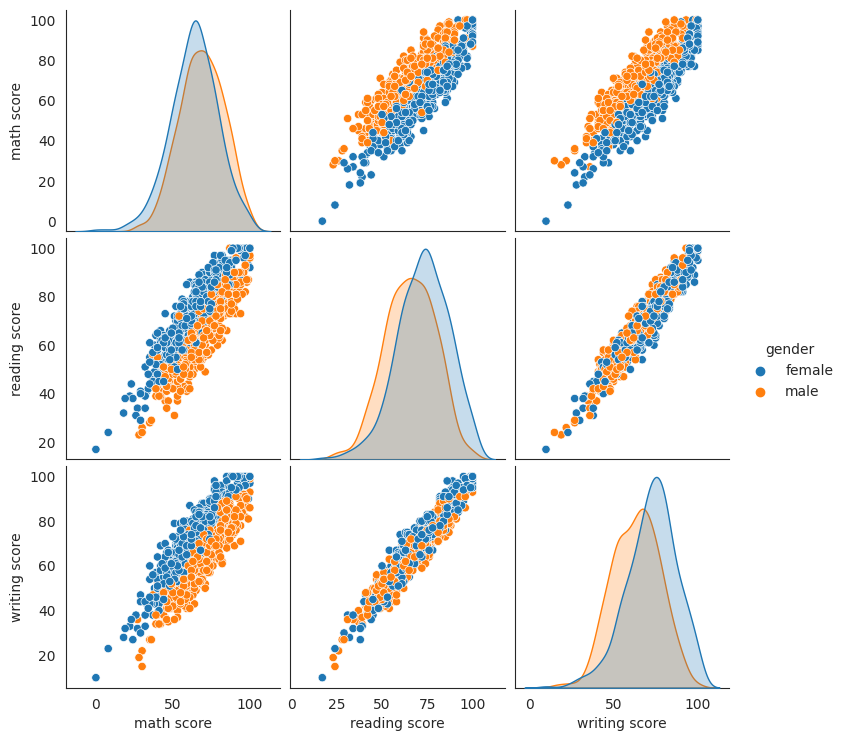

In [ ]:
sns.pairplot(data=sdt, hue='gender')

Visualizing multiple variable in data

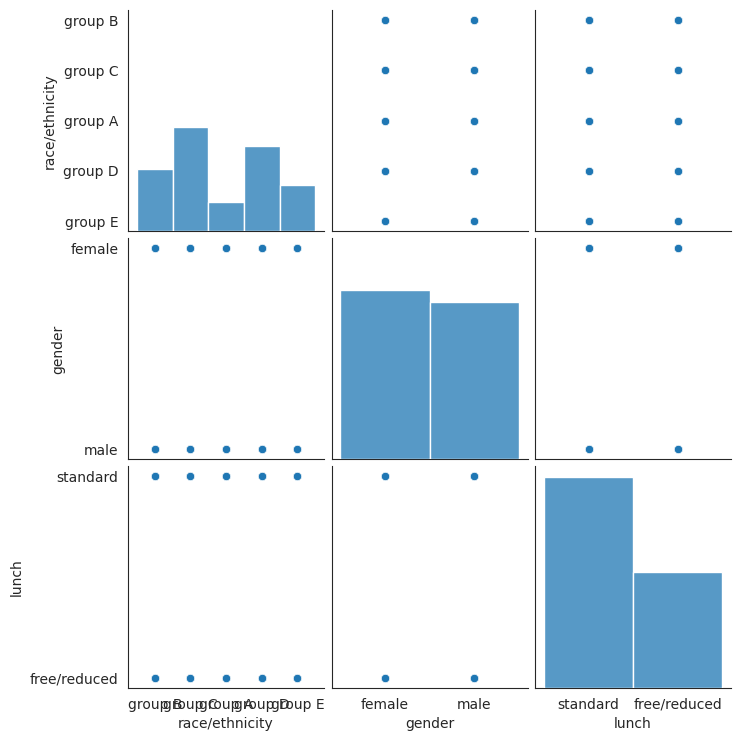

In [ ]:
sns.pairplot(data=sdt,vars=['race/ethnicity','gender','lunch'])
plt.show()

Kernel Density Estimate plot

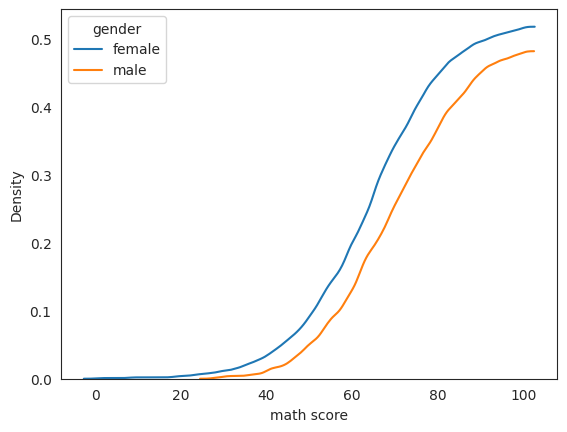

In [ ]:
sns.kdeplot(data=sdt, x='math score', hue='gender', bw_adjust=0.2, cumulative=True)
plt.show()

The results are close to each other, but girls are more successful than boys